In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from array import *
%matplotlib inline
from scipy.interpolate import interp1d
from scipy.interpolate import griddata
from IPython.display     import Image
import os
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
def closest_index(array, number):
    # Calculate the absolute difference between each array element and the given number
    differences = [abs(x - number) for x in array]

    # Find the index of the smallest difference
    closest_index = differences.index(min(differences))

    return closest_index

def max_index_in_portion(array, start, end):
    # Ensure the portion is within the array bounds
    if start < 0 or end > len(array) or start > end:
        return "Invalid portion of array"

    # Get the portion of the array
    portion = array[start:end]

    # Find the index of the max value in the portion
    max_index_portion = np.argmax(portion)

    # Convert the index in the portion to the index in the original array
    max_index_array = start + max_index_portion

    return max_index_array
def close_indices_in_portion(array1, array2, start, end, tolerance):
    # Ensure the portion is within the array bounds
    if start < 0 or end > len(array1) or end > len(array2) or start > end:
        return "Invalid portion of array"

    # Get the portions of the arrays
    portion1 = array1[start:end]
    portion2 = array2[start:end]

    # Find the indices where the two portions are close to each other
    close_indices_portion = np.where(np.isclose(portion1, portion2, atol=tolerance))[0]

    # Convert the indices in the portion to the indices in the original arrays
    close_indices_array = start + close_indices_portion

    return close_indices_array

In [2]:
current_path = os.getcwd()
parent_directory = os.path.dirname(current_path)

folders = parent_directory+"\\.4M Data\\"
folders1 = parent_directory+"\\.7M Data\\"
folders2 = parent_directory+"\\1M Data\\"
folders3 = parent_directory+"\\1.3M Data\\"
folders4 = parent_directory+"\\1.6M Data\\"
folders5 = parent_directory+"\\0M Data\\"
folder2 = parent_directory+"\\Edilons\\"

In [3]:
#Load in Data
#.4M Data
L11 = np.array(pd.read_csv(folders+"-4M_1.tsv",sep="\t"))[:,1]
L12 = np.array(pd.read_csv(folders+"-4M_2.tsv",sep="\t"))[:,1]
L21 = np.array(pd.read_csv(folders+"-4M_3.tsv",sep="\t"))[:,1] 
L22 = np.array(pd.read_csv(folders+"-4M_4.tsv",sep="\t"))[:,1]
L31 = np.array(pd.read_csv(folders+"-4M_5.tsv",sep="\t"))[:,1] 
L32 = np.array(pd.read_csv(folders+"-4M_6.tsv",sep="\t"))[:,1] 
wn = np.array(pd.read_csv(folders+"-4M_1.tsv",sep="\t"))[:,0] #Wavenumber set
#.7M Data
M71 = np.array(pd.read_csv(folders1+"-7M_1.tsv",sep="\t"))[:,1]
M72 = np.array(pd.read_csv(folders1+"-7M_2.tsv",sep="\t"))[:,1]
M73 = np.array(pd.read_csv(folders1+"-7M_3.tsv",sep="\t"))[:,1] 
M74 = np.array(pd.read_csv(folders1+"-7M_4.tsv",sep="\t"))[:,1]
M75 = np.array(pd.read_csv(folders1+"-7M_5.tsv",sep="\t"))[:,1] 
M76 = np.array(pd.read_csv(folders1+"-7M_6.tsv",sep="\t"))[:,1] 
#1M Data
M11 = np.array(pd.read_csv(folders2+"1M_1.tsv",sep="\t"))[:,1]
M12 = np.array(pd.read_csv(folders2+"1M_2.tsv",sep="\t"))[:,1]
M13 = np.array(pd.read_csv(folders2+"1M_3.tsv",sep="\t"))[:,1] 
M14 = np.array(pd.read_csv(folders2+"1M_4.tsv",sep="\t"))[:,1]
M15 = np.array(pd.read_csv(folders2+"1M_5.tsv",sep="\t"))[:,1] 
M16 = np.array(pd.read_csv(folders2+"1M_6.tsv",sep="\t"))[:,1] 
#1.3M Data
M131 = np.array(pd.read_csv(folders3+"1-3M_1.tsv",sep="\t"))[:,1]
M132 = np.array(pd.read_csv(folders3+"1-3M_2.tsv",sep="\t"))[:,1]
M133 = np.array(pd.read_csv(folders3+"1-3M_3.tsv",sep="\t"))[:,1] 
M134 = np.array(pd.read_csv(folders3+"1-3M_4.tsv",sep="\t"))[:,1]
M135 = np.array(pd.read_csv(folders3+"1-3M_5.tsv",sep="\t"))[:,1] 
M136 = np.array(pd.read_csv(folders3+"1-3M_6.tsv",sep="\t"))[:,1] 
#1.6M Data
M161 = np.array(pd.read_csv(folders4+"1-6M_1.tsv",sep="\t"))[:,1]
M162 = np.array(pd.read_csv(folders4+"1-6M_2.tsv",sep="\t"))[:,1]
M163 = np.array(pd.read_csv(folders4+"1-6M_3.tsv",sep="\t"))[:,1] 
M164 = np.array(pd.read_csv(folders4+"1-6M_4.tsv",sep="\t"))[:,1]
M165 = np.array(pd.read_csv(folders4+"1-6M_5.tsv",sep="\t"))[:,1] 
M166 = np.array(pd.read_csv(folders4+"1-6M_6.tsv",sep="\t"))[:,1] 
#0M Data
M01 = np.array(pd.read_csv(folders5+"0M_1.tsv",sep="\t"))[:,1]
M02 = np.array(pd.read_csv(folders5+"0M_2.tsv",sep="\t"))[:,1]
M03 = np.array(pd.read_csv(folders5+"0M_3.tsv",sep="\t"))[:,1] 
M04 = np.array(pd.read_csv(folders5+"0M_4.tsv",sep="\t"))[:,1]
M05 = np.array(pd.read_csv(folders5+"0M_5.tsv",sep="\t"))[:,1] 
M06 = np.array(pd.read_csv(folders5+"0M_6.tsv",sep="\t"))[:,1] 

0.31158772110939


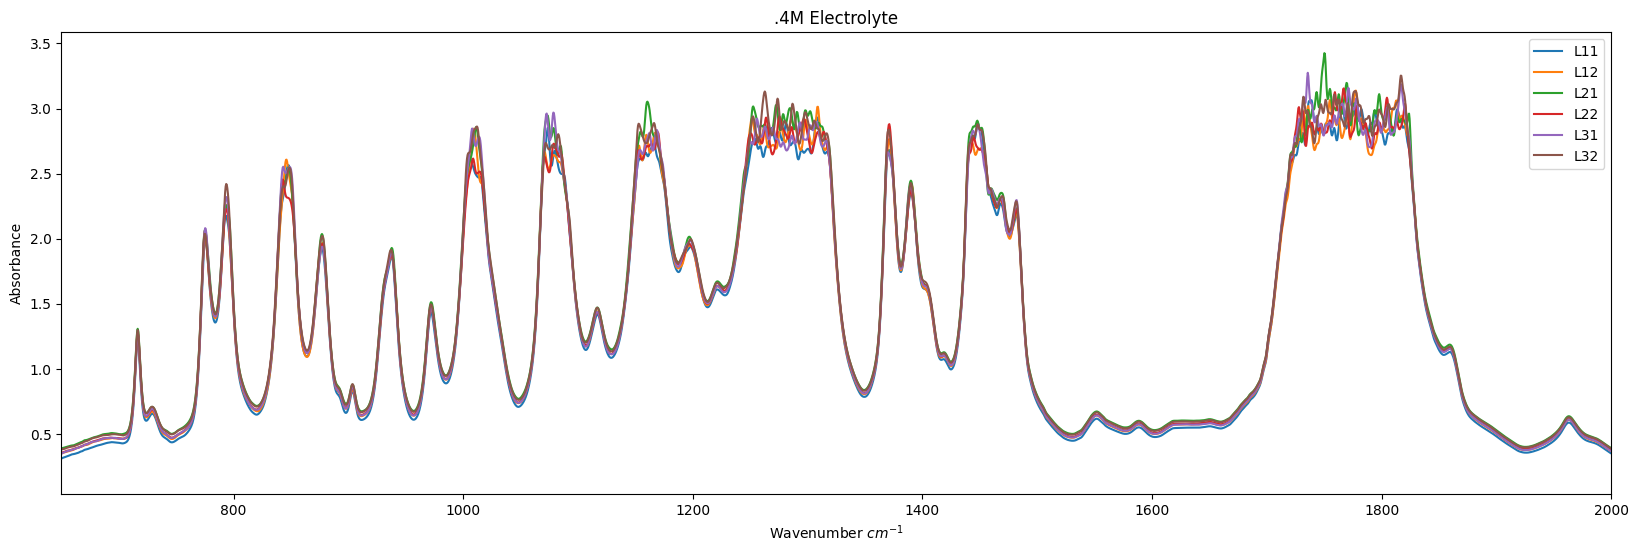

In [4]:
plt.figure(figsize=(20,6))
plt.plot(wn,L11,label="L11")
plt.plot(wn,L12,label="L12")
plt.plot(wn,L21,label="L21")
plt.plot(wn,L22,label="L22")
plt.plot(wn,L31,label="L31")
plt.plot(wn,L32,label="L32")
plt.legend()
plt.title(".4M Electrolyte")
plt.xlim(650,2000)
#plt.ylim(0,1.2)
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
print(L11[1])

(0.0, 2.5)

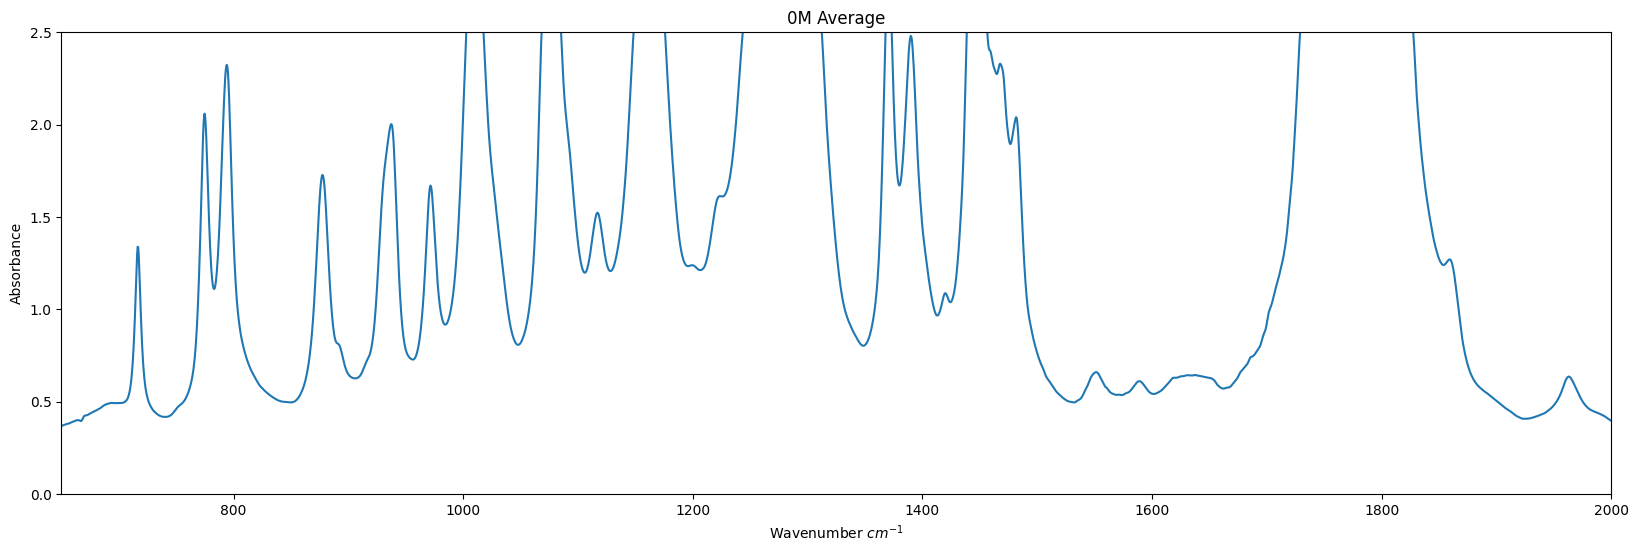

In [5]:
avg0 = np.zeros(len(L11))

for i in range(len(L11)):
    avg0[i] = np.average(np.array([M01[i],M02[i],M03[i],M04[i],M05[i],M06[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg0)
plt.title("0M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

(0.0, 2.5)

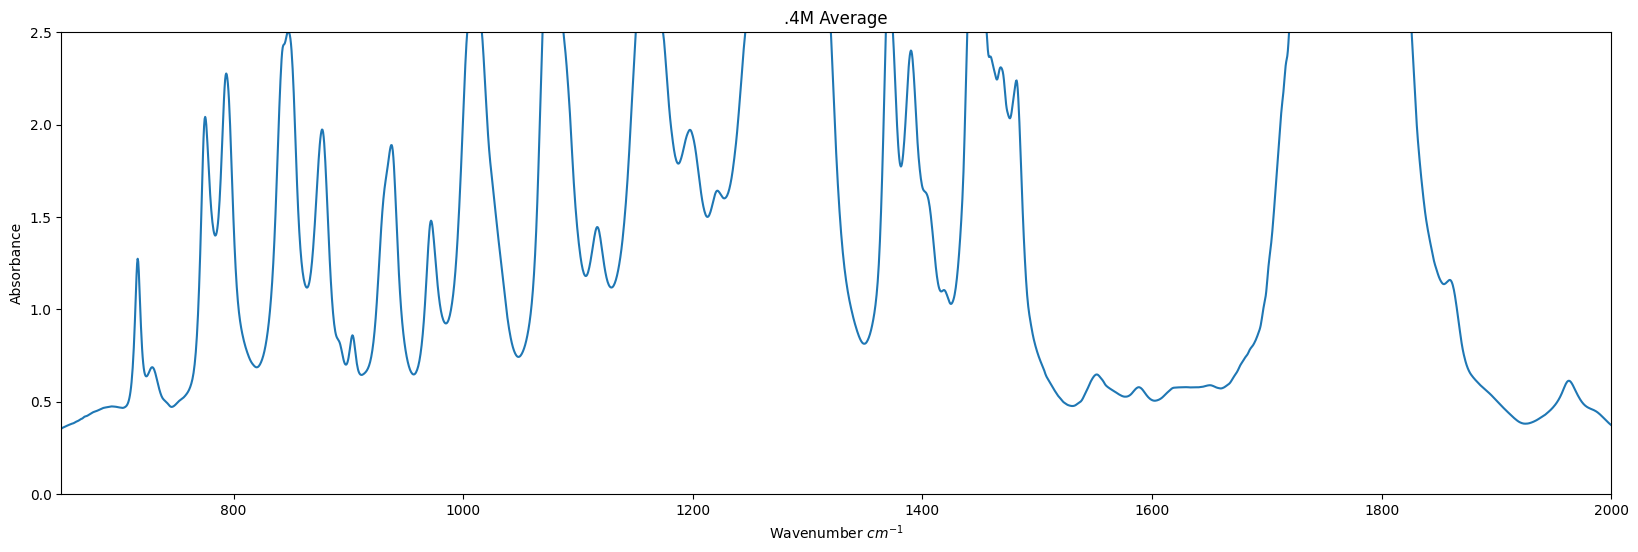

In [6]:
avg4 = np.zeros(len(L11))

for i in range(len(L11)):
    avg4[i] = np.average(np.array([L11[i],L12[i],L21[i],L22[i],L31[i],L32[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg4)
plt.title(".4M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

(0.0, 2.5)

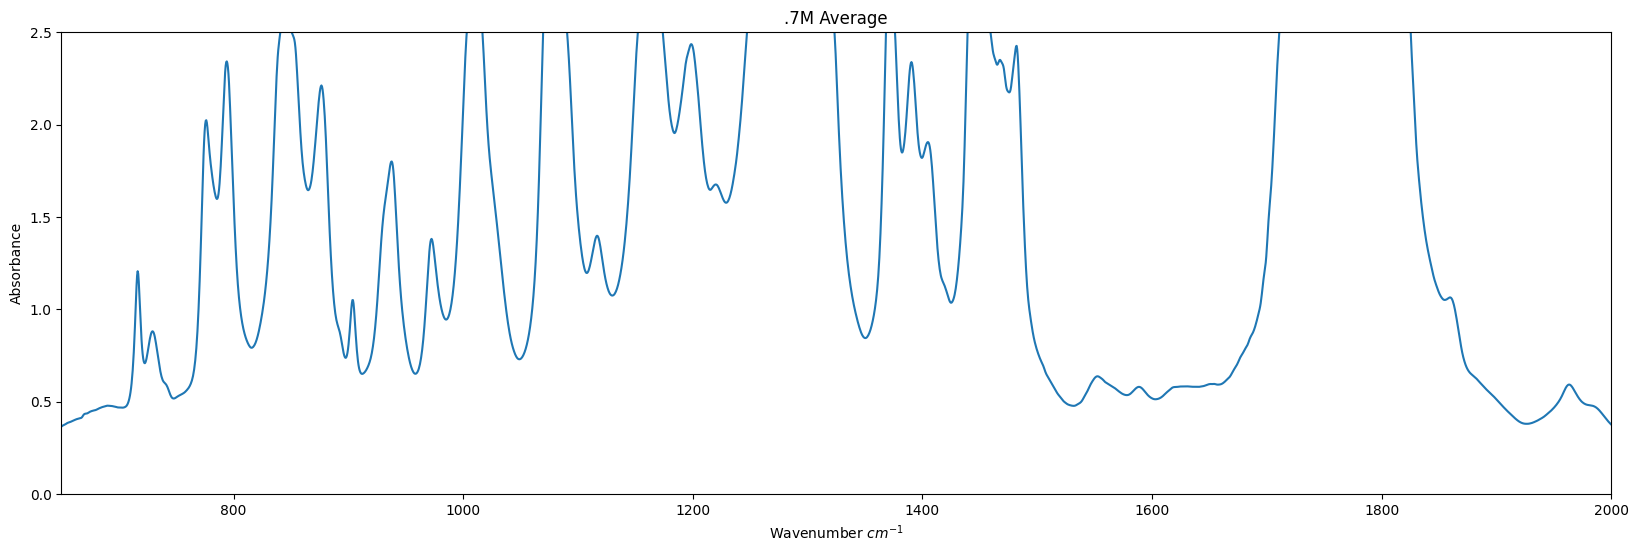

In [7]:
avg7 = np.zeros(len(L11))

for i in range(len(L11)):
    avg7[i] = np.average(np.array([M71[i],M72[i],M73[i],M74[i],M75[i],M76[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg7)
plt.title(".7M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

(0.0, 2.5)

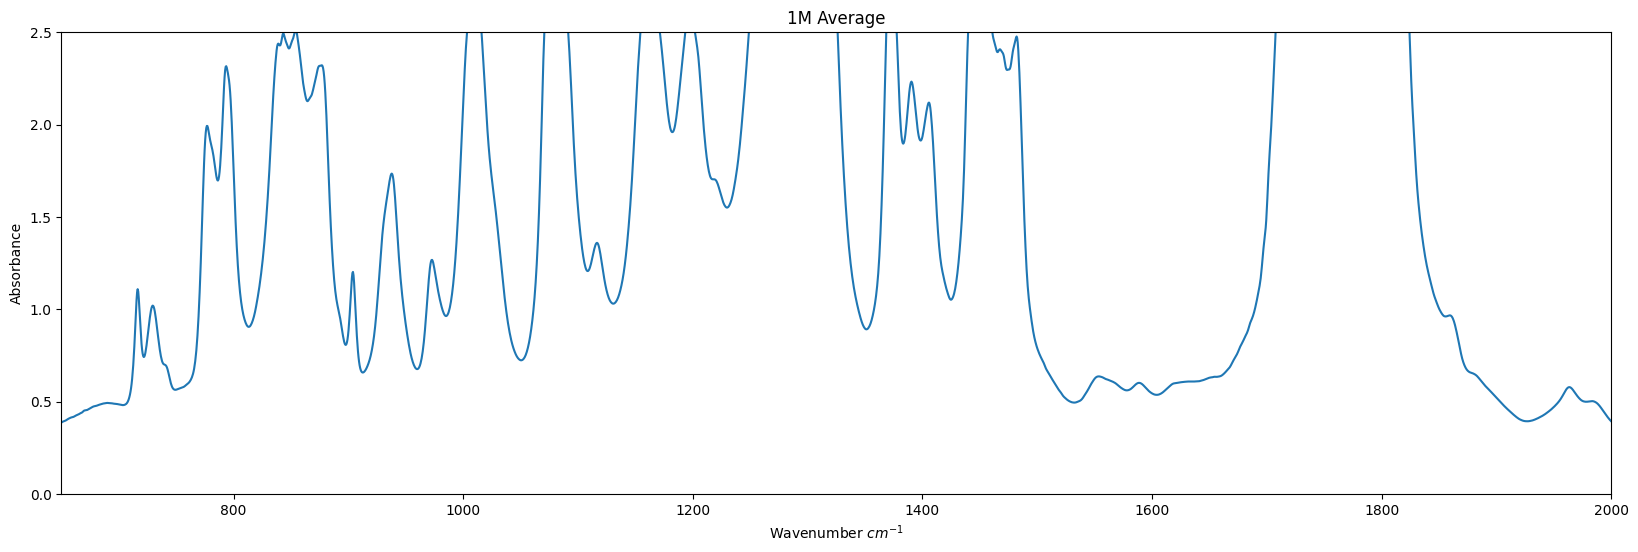

In [8]:
avg1 = np.zeros(len(L11))

for i in range(len(L11)):
    avg1[i] = np.average(np.array([M11[i],M12[i],M13[i],M14[i],M15[i],M16[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg1)
plt.title("1M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

(0.0, 2.5)

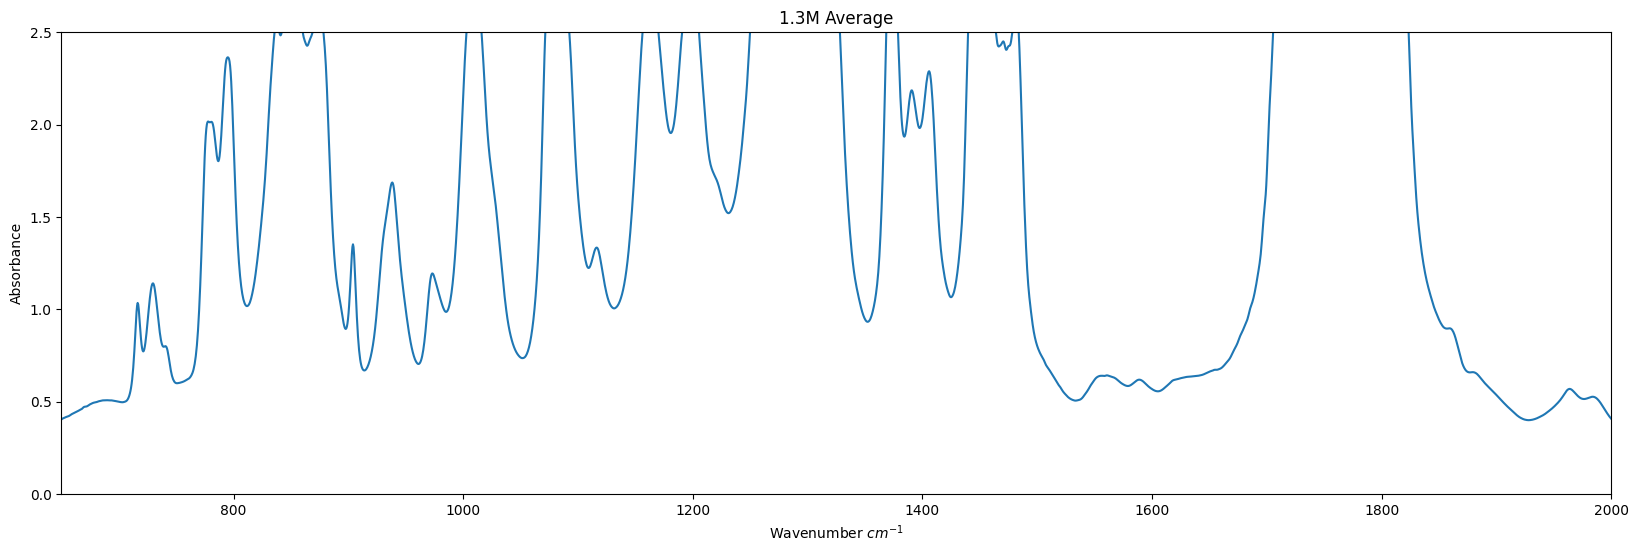

In [9]:
avg13 = np.zeros(len(L11))

for i in range(len(L11)):
    avg13[i] = np.average(np.array([M131[i],M132[i],M133[i],M134[i],M135[i],M136[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg13)
plt.title("1.3M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

(0.0, 2.5)

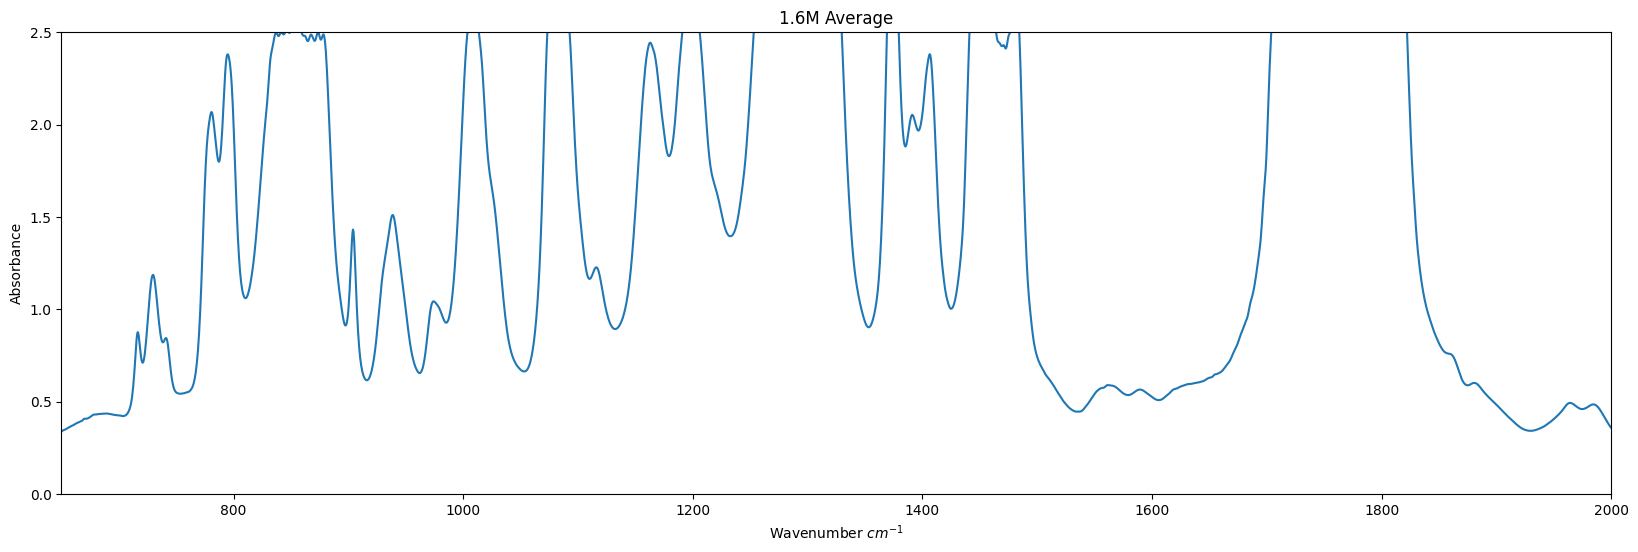

In [10]:
avg16 = np.zeros(len(L11))

for i in range(len(L11)):
    avg16[i] = np.average(np.array([M161[i],M162[i],M163[i],M164[i],M165[i],M166[i]]));

plt.figure(figsize=(20,6))
plt.plot(wn,avg16)
plt.title("1.6M Average")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
#plt.xlim(700,800)
plt.xlim(650,2000)
plt.ylim(0,2.5)

(0.0, 3.0)

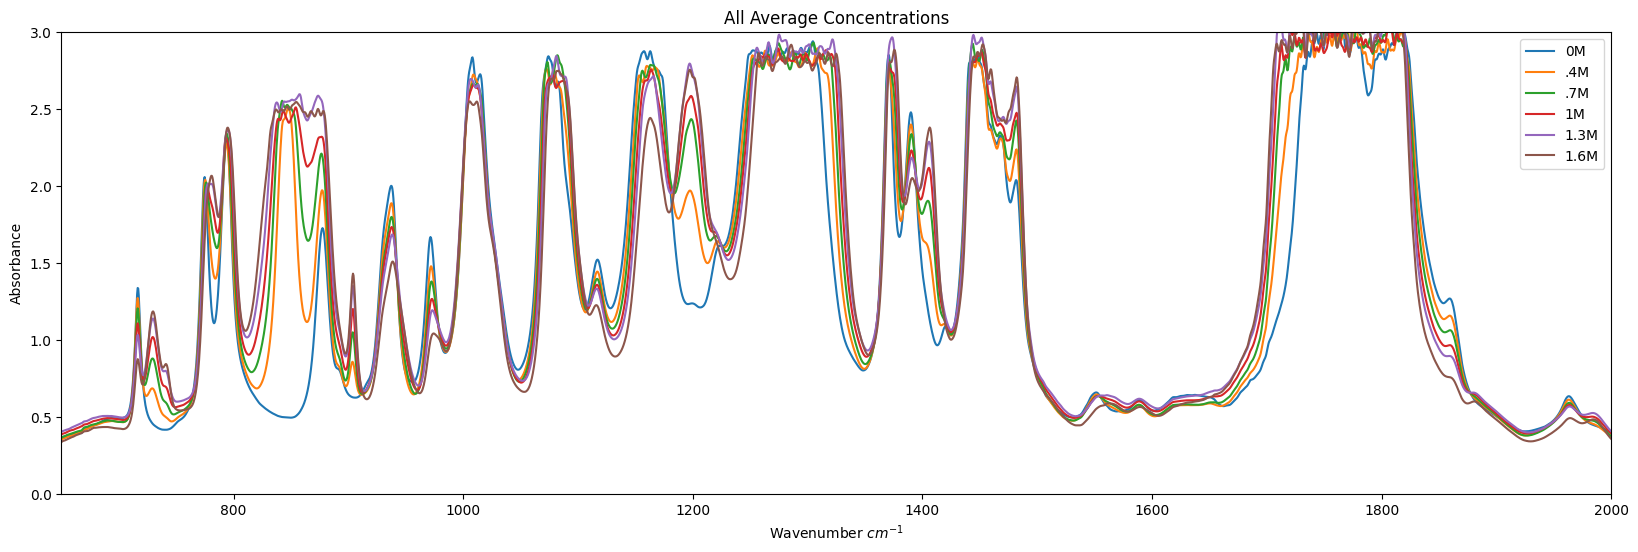

In [11]:
plt.figure(figsize=(20,6))
plt.plot(wn,avg0,label="0M")
plt.plot(wn,avg4,label=".4M")
plt.plot(wn,avg7,label=".7M")
plt.plot(wn,avg1,label="1M")
plt.plot(wn,avg13,label="1.3M")
plt.plot(wn,avg16,label="1.6M")
plt.legend()
plt.title("All Average Concentrations")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")
plt.xlim(650,2000)
plt.ylim(0,3)

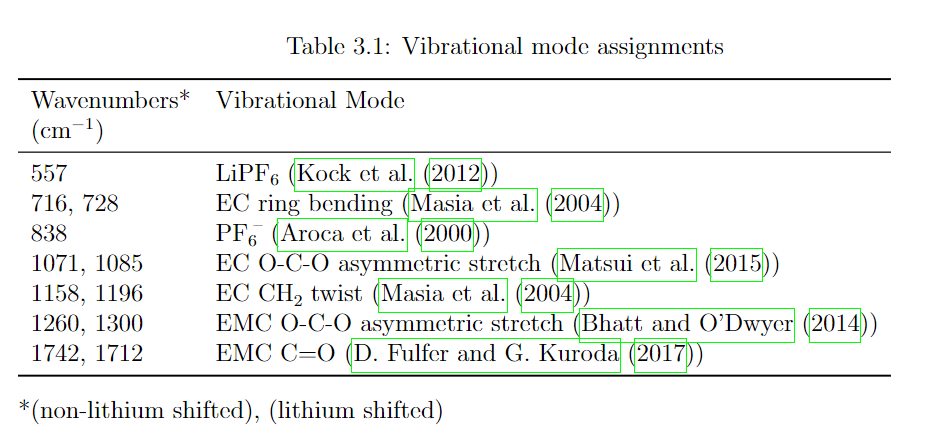

In [12]:
Image(filename="peak_assignments.png",width=600)

Usable peaks: \
716, 728 cm$^{-1}$  EC ring bending\
1085 EC O-C-O asymmetric stretch\
1196 EC CH$_2$ twist\
Non-assigned possibilities:\
794, 937, 972\
\
All of the analysis methods used by Lydia are not possible due to our cell thickness. We must create our own fitting methods for Li concentration.

Method 1: 716cm$^{-1}$/728cm$^{-1}$ peak ratio\
EC ring bending

R2 of the Diagnostic curve fit is 0.9993330021244704


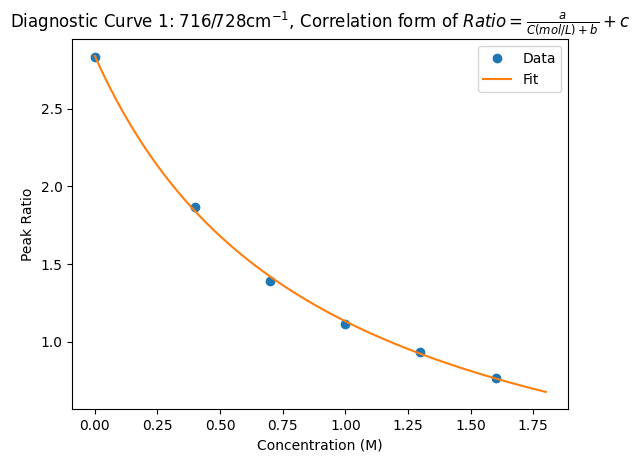

In [13]:
x1 = np.where(wn == 716.527557922003)[0]
x2 = np.where(wn == 728.097567995395)[0]
concar = np.array([0,.4,.7,1,1.3,1.6])

def func(x,a,b,c):
    return (a / (b + x)) + c

Cor1_0M = (avg0[x1]/avg0[x2])
Cor1_4M = avg4[x1]/avg4[x2]
Cor1_7M = avg7[x1]/avg7[x2]
Cor1_1M = avg1[x1]/avg1[x2]
Cor1_13M = avg13[x1]/avg13[x2]
Cor1_16M = avg16[x1]/avg16[x2]
Cor1ar = np.array([Cor1_0M[0],Cor1_4M[0],Cor1_7M[0],Cor1_1M[0],Cor1_13M[0],Cor1_16M[0]])

corfit1,extras = curve_fit(func,concar,Cor1ar)

xx = np.linspace(0,1.8,1000)
yy1 = func(xx,corfit1[0],corfit1[1],corfit1[2])
plt.plot(concar,Cor1ar,'o',label="Data")
plt.plot(xx,yy1,label="Fit")
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Ratio")
plt.title(r"Diagnostic Curve 1: 716/728cm$^{-1}$, Correlation form of $Ratio = \frac{a}{C (mol/L) + b} + c$")
plt.legend()

#R2 Score of Fit
f1 = func(concar,corfit1[0],corfit1[1],corfit1[2])
r21 = r2_score(Cor1ar,f1)
print("R2 of the Diagnostic curve fit is",r21)


Method 3: Peak height at 1196\
EC CH$_2$ twist\
!!Can we use this? The peaks at 1.3M and 1.6M might be saturating out so this is inaccurate!!

R2 of the Diagnostic curve fit is 0.9966747187806821


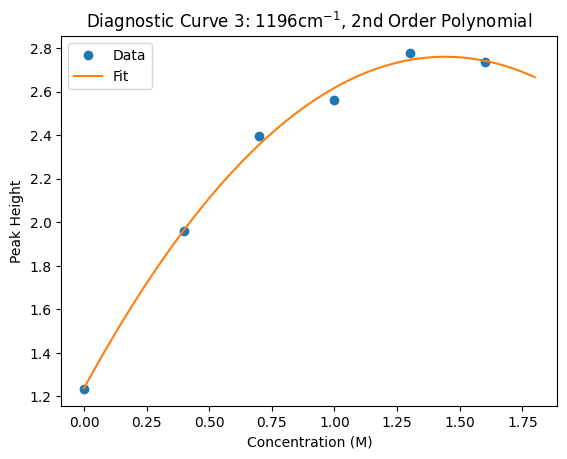

In [14]:
x4 = np.where(wn == 1196.20089221471)[0]
Cor3ar = np.array([avg0[x4],avg4[x4],avg7[x4],avg1[x4],avg13[x4],avg16[x4]])
corfit3 = np.polyfit(concar,Cor3ar,2)
yy3 = np.polyval(corfit3,xx)
plt.plot(concar,Cor3ar,'o',label="Data")
plt.plot(xx,yy3,label="Fit")
plt.legend()
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Height")
plt.title("Diagnostic Curve 3: 1196cm$^{-1}$, 2nd Order Polynomial")
#R2 Score of Fit
f2 = np.polyval(corfit3,concar)
r22 = r2_score(Cor3ar,f2)
print("R2 of the Diagnostic curve fit is",r22)
#help(np.polyval)

Method 4: Peak minimum height at 794

R2 of the Diagnostic curve fit is 0.4234865381251227


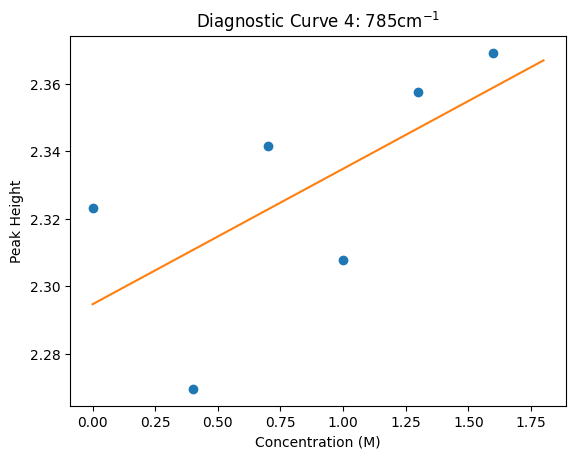

In [15]:
x5 = np.where(wn == 794.14304216434)[0]
Cor4ar = np.array([avg0[x5],avg4[x5],avg7[x5],avg1[x5],avg13[x5],avg16[x5]])
corfit4 = np.polyfit(concar,Cor4ar,1)
yy4 = np.polyval(corfit4,xx)
plt.plot(concar,Cor4ar,'o')
plt.plot(xx,yy4)
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Height")
plt.title("Diagnostic Curve 4: 785cm$^{-1}$")
#R2 Score of Fit
f4 = np.polyval(corfit4,concar)
r24 = r2_score(Cor4ar,f4)
print("R2 of the Diagnostic curve fit is",r24)

Method 5: Peak height at 905

1.4317790269851667
R2 of the Diagnostic curve fit is 0.9873685466847831


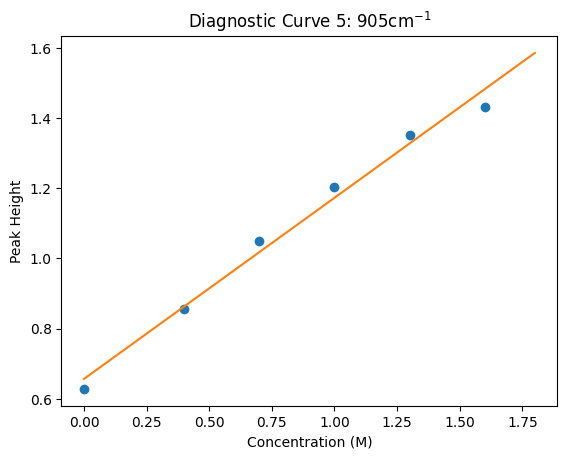

In [16]:
x6 = max_index_in_portion(avg16,closest_index(wn, 900),closest_index(wn, 910))
print(avg16[x6])
Cor5ar = np.array([avg0[x6],avg4[x6],avg7[x6],avg1[x6],avg13[x6],avg16[x6]])
corfit5 = np.polyfit(concar,Cor5ar,1)
yy5 = np.polyval(corfit5,xx)
plt.plot(concar,Cor5ar,'o')
plt.plot(xx,yy5)
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Height")
plt.title("Diagnostic Curve 5: 905cm$^{-1}$")
#R2 Score of Fit
f5 = np.polyval(corfit5,concar)
r25 = r2_score(Cor5ar,f5)
print("R2 of the Diagnostic curve fit is",r25)

Method 6: Peak at 971.5

971.549863289682
R2 of the Diagnostic curve fit is 0.993057506416239


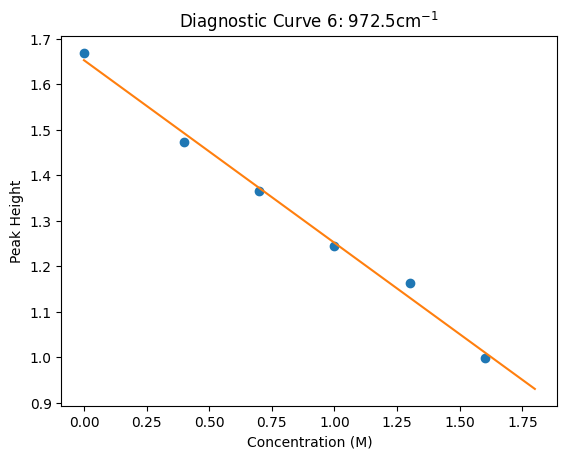

In [17]:
x6 = max_index_in_portion(avg0,closest_index(wn, 960),closest_index(wn, 980))
#x6 = np.where(wn == 972.514030795798)[0]
print(wn[x6])
Cor6ar = np.array([avg0[x6],avg4[x6],avg7[x6],avg1[x6],avg13[x6],avg16[x6]])
corfit6 = np.polyfit(concar,Cor6ar,1)
yy6 = np.polyval(corfit6,xx)
plt.plot(concar,Cor6ar,'o')
plt.plot(xx,yy6)
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Height")
plt.title("Diagnostic Curve 6: 972.5cm$^{-1}$")
#R2 Score of Fit
f6 = np.polyval(corfit6,concar)
r26 = r2_score(Cor6ar,f6)
print("R2 of the Diagnostic curve fit is",r26)

Method 7: Peak height at 934

R2 of the Diagnostic curve fit is 0.9686387805491746


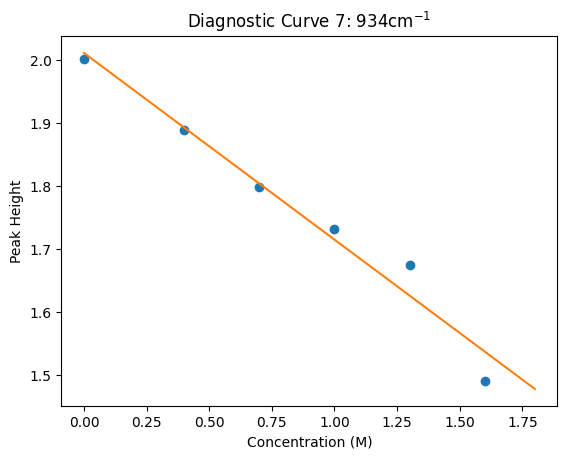

In [18]:
x7 = max_index_in_portion(avg0,closest_index(wn, 920),closest_index(wn, 945))
Cor7ar = np.array([avg0[x7],avg4[x7],avg7[x7],avg1[x7],avg13[x7],avg16[x7]])
corfit7 = np.polyfit(concar,Cor7ar,1)
yy7 = np.polyval(corfit7,xx)
plt.plot(concar,Cor7ar,'o')
plt.plot(xx,yy7)
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Height")
plt.title("Diagnostic Curve 7: 934cm$^{-1}$")
#R2 Score of Fit
f7 = np.polyval(corfit7,concar)
r27 = r2_score(Cor7ar,f7)
print("R2 of the Diagnostic curve fit is",r27)

Method 8: \
Integration from 1395 to 1420

1394.8193984746 1420.36983738667
R2 of the Diagnostic curve fit is 0.9970395006366558


C:\Users\Modes Lab\AppData\Local\Temp\ipykernel_9308\2313025977.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  start8 = int(close_indices_in_portion(avg0, avg16, closest_index(wn,1385), closest_index(wn,1400), .02))
C:\Users\Modes Lab\AppData\Local\Temp\ipykernel_9308\2313025977.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end8 = int(close_indices_in_portion(avg0, avg16, closest_index(wn,1410), closest_index(wn,1425), .005))


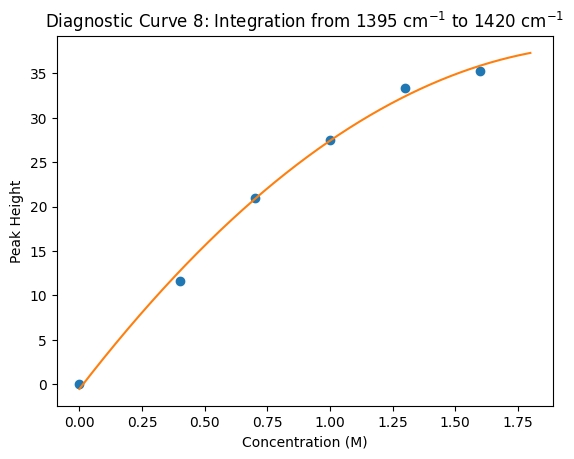

In [20]:
start8 = int(close_indices_in_portion(avg0, avg16, closest_index(wn,1385), closest_index(wn,1400), .02))
end8 = int(close_indices_in_portion(avg0, avg16, closest_index(wn,1410), closest_index(wn,1425), .005))
Cor8ar = np.array([0,np.trapz(avg4[start8:end8]-avg0[start8:end8]),np.trapz(avg7[start8:end8]-avg0[start8:end8]),\
                   np.trapz(avg1[start8:end8]-avg0[start8:end8]),np.trapz(avg13[start8:end8]-avg0[start8:end8]),\
                   np.trapz(avg16[start8:end8]-avg0[start8:end8])])
print(wn[start8],wn[end8])
corfit8 = np.polyfit(concar,Cor8ar,2)
yy8 = np.polyval(corfit8,xx)
plt.plot(concar,Cor8ar,'o')
plt.plot(xx,yy8)
plt.xlabel("Concentration (M)")
plt.ylabel("Peak Height")
plt.title("Diagnostic Curve 8: Integration from 1395 cm$^{-1}$ to 1420 cm$^{-1}$")
#R2 Score of Fit
f8 = np.polyval(corfit8,concar)
r28 = r2_score(Cor8ar,f8)
print("R2 of the Diagnostic curve fit is",r28)

C:\Users\Modes Lab\AppData\Local\Temp\ipykernel_9308\3122382249.py:2: RuntimeWarning: divide by zero encountered in log
  return a*np.log(b*x)
C:\Users\Modes Lab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


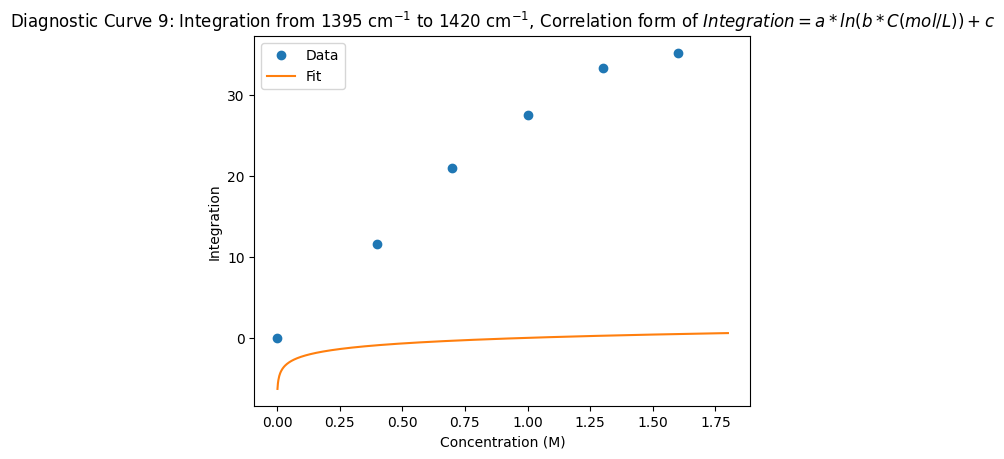

In [21]:
def func2(x,a,b):
    return a*np.log(b*x)

corfit9,extras = curve_fit(func2,concar,Cor8ar)

yy9 = func2(xx,corfit9[0],corfit9[1])
plt.plot(concar,Cor8ar,'o',label="Data")
plt.plot(xx,yy9,label="Fit")
plt.xlabel("Concentration (M)")
plt.ylabel("Integration")
plt.title(r"Diagnostic Curve 9: Integration from 1395 cm$^{-1}$ to 1420 cm$^{-1}$, Correlation form of $Integration = a * ln(b*C(mol/L)) + c$")
plt.legend()

#R2 Score of Fit
f9 = func2(concar,corfit9[0],corfit9[1])
#r29 = r2_score(Cor8ar,f9)
#print("R2 of the Diagnostic curve fit is",r29)


Fringe Test:

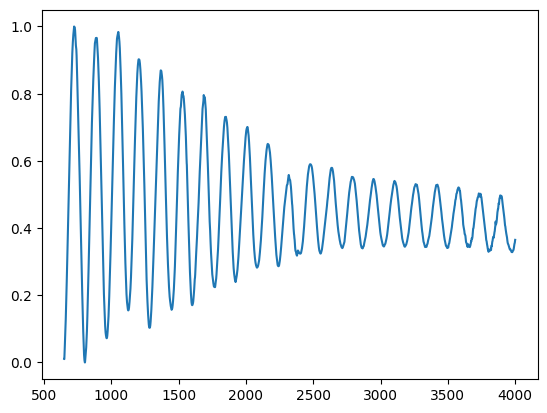

In [22]:
Fringe = np.array(pd.read_csv(folder2+"Finished_Cell_Fringe_Test.tsv",sep="\t"))
plt.plot(Fringe[:,0],Fringe[:,1])

In [23]:
Thick = 10*15/(2*(3422.06438155867-1051.01441160458))*1000
print("Cell Thickness =",round(Thick,1),"μm")

Cell Thickness = 31.6 μm


In [24]:
#plt.figure(figsize=(20,6))
Bottom = np.array(pd.read_csv(folders+"-4M Bottom.tsv",sep="\t"))
plt.plot(Bottom[:,0],Bottom[:,1])
Top = np.array(pd.read_csv(folders+"-4M Top.tsv",sep="\t"))
plt.plot(Top[:,0],Top[:,1])
plt.xlim(4000,650)
plt.title("Top and Bottom of line scan")
plt.ylabel("Absorbance")
plt.xlabel("Wavenumber $cm^{-1}$")

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Modes Lab\\Desktop\\MODES\\Battery Data\\Li-Li Symmetric Cell\\.4M Data\\-4M Bottom.tsv'